In [0]:
## Train a simple convnet on the Fashion MNIST dataset

In [0]:
#In this, we will see how to deal with image data and train a convnet for image classification task.

In [4]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
import keras
#from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


In [0]:
### Load the  `fashion_mnist`  dataset

#** Use keras.datasets to load the dataset **

In [6]:
#from keras.datasets import fashion_mnist
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(X_train, y_train_num), (X_test, y_test_num) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
### Find no.of samples are there in training and test datasets

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [0]:
### Find dimensions of an image in the dataset

In [109]:
#28*28 is the shape
X_train.shape[1:]

(28, 28, 1)

In [0]:
### Convert train and test labels to one hot vectors

#** check `keras.utils.to_categorical()` **

In [13]:
y_train = np_utils.to_categorical(y_train_num, 10)
y_train.shape

(60000, 10)

In [14]:
y_test = np_utils.to_categorical(y_test_num, 10)
y_test.shape

(10000, 10)

In [0]:
### Normalize both the train and test image data from 0-255 to 0-1

In [16]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.astype('float32')

In [0]:
X_test = X_test.astype('float32')

In [0]:
X_train /= 255

In [0]:
X_test /= 255

In [0]:
### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [22]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train.shape

(60000, 28, 28, 1)

In [0]:
### Import the necessary layers from keras to build the model

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
#Build a model
# with 2 Conv layers having `32 33 filtersin both convolutions withrelu activationsandflattenbefore passing the feature map into 2 fully connected layers (or Dense Layers) 
#having 128 and 10 neurons withreluandsoftmaxactivations respectively. Now, usingcategorical_crossentropyloss withadamoptimizer train the model with early stoppingpatience=5and no.ofepochs=10`. **

In [0]:
# Define model
model2 = Sequential()

In [27]:
# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


In [28]:
# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

In [0]:
# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [0]:
# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
__________

In [0]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [34]:
y_train.shape

(60000, 10)

In [35]:
y_test.shape

(10000, 10)

In [36]:
# Train the model2
model2.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS,
           validation_data=(X_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.3759 - acc: 0.8642 - val_loss: 0.3226 - val_acc: 0.8839
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.2386 - acc: 0.9117 - val_loss: 0.2668 - val_acc: 0.9021
Epoch 3/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.1753 - acc: 0.9341 - val_loss: 0.2434 - val_acc: 0.9116
Epoch 4/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1245 - acc: 0.9539 - val_loss: 0.2551 - val_acc: 0.9122
Epoch 5/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.0835 - acc: 0.9687 - val_loss: 0.3139 - val_acc: 0.9140
Epoch 6/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0576 - acc: 0.9783 - val_loss: 0.3304 - val_acc: 0.9131
Epoch 7/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0426 - acc: 0.9844 - val_loss: 0.

In [0]:
### Now, to the above model add `maX` pooling layer of `filter size 2X2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
# Define Model
model3 = Sequential()

In [51]:
# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


In [52]:
# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# Dropout
model3.add(Dropout(0.25))

In [0]:
# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))

In [0]:
# More Dropout
#model3.add(Dropout(0.5))

# Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

In [0]:
# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [59]:
# Train the model
model3.fit(X_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
           validation_data=(X_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.3886 - acc: 0.8602 - val_loss: 0.2864 - val_acc: 0.8954
Epoch 2/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.2574 - acc: 0.9054 - val_loss: 0.2541 - val_acc: 0.9068
Epoch 3/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.2093 - acc: 0.9225 - val_loss: 0.2401 - val_acc: 0.9136
Epoch 4/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1758 - acc: 0.9336 - val_loss: 0.2262 - val_acc: 0.9180
Epoch 5/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.1501 - acc: 0.9436 - val_loss: 0.2406 - val_acc: 0.9190
Epoch 6/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1254 - acc: 0.9526 - val_loss: 0.2279 - val_acc: 0.9250
Epoch 7/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.1058 - acc: 0.9598 - val_loss: 0.2476 - 

In [0]:
### Now, to the above model, lets add Data Augmentation 

In [0]:
### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20, # random;y rotate images in range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images horizontally (fraction of total height)
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                    steps_per_epoch=len(x_train) / 32, epochs=epochs)


In [0]:
#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

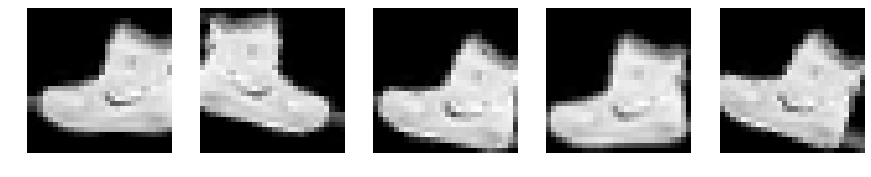

In [112]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
### Run the above model using fit_generator()

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
# Define Model
model4 = Sequential()

In [116]:
# 1st Conv Layer
model4.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model4.add(Activation('relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


In [117]:
# 2nd Conv Layer
model4.add(Convolution2D(32, 3, 3))
model4.add(Activation('relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
# Max Pooling
model4.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# Dropout
model4.add(Dropout(0.25))

In [0]:
# Fully Connected Layer
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Activation('relu'))

In [0]:
# More Dropout
model4.add(Dropout(0.5))

# Prediction Layer
model4.add(Dense(10))
model4.add(Activation('softmax'))

In [0]:
# Loss and Optimizer
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [124]:
X_train.shape[0]

60000

In [126]:
# Train the model
model4.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), samples_per_epoch=X_train.shape[0],nb_epoch=10, 
           validation_data=(X_test, y_test), callbacks=callback_list)

Epoch 1/10
  17/1875 [..............................] - ETA: 20s - loss: 0.4410 - acc: 0.8217

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  


1875/1875 [==============================] - 19s 10ms/step - loss: 0.4392 - acc: 0.8388 - val_loss: 0.3308 - val_acc: 0.8810
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4339 - acc: 0.8424 - val_loss: 0.3340 - val_acc: 0.8804
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4292 - acc: 0.8434 - val_loss: 0.3392 - val_acc: 0.8820
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4199 - acc: 0.8472 - val_loss: 0.3362 - val_acc: 0.8833
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4154 - acc: 0.8507 - val_loss: 0.3218 - val_acc: 0.8888
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4096 - acc: 0.8511 - val_loss: 0.3172 - val_acc: 0.8880
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4045 - acc: 0.8532 - val_loss: 0.3153 - val_acc: 0.8859
Epoch 8/10
1875/1875 [==============================] - 18s

In [0]:
###  Report the final train and validation accuracy

In [127]:
# final train accuracy
model4.evaluate(X_train,y_train)

60000/60000 [==============================] - 3s 56us/step


[0.2648729014048974, 0.9036666666666666]

In [128]:
# final validation accuracy
model4.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 58us/step


[0.3014788166165352, 0.8936]